In [1]:
# загрузка необходимых библиотек
import pandas as pd 
import numpy as np
import scipy.stats as sts
import math
from scipy.stats import t

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", palette="muted")

alpha = 0.05

**1 ЗАДАЧА**

In [2]:
# пункт а)

order = 10
lst = []
for i in range(1, 1001):
    a = 1
    for j in range(1, order - 1):
        a *= (i-j) / i
    a *= (order - 1) / i
    lst.append(a)

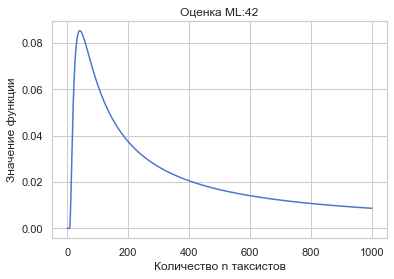

In [3]:
plt.plot(list(range(1, 1001)), lst)
plt.xlabel('Количество n таксистов')
plt.ylabel('Значение функции')
plt.title('Оценка ML:'+ str(np.argmax(lst) + 1));

In [ ]:
# пункт б)

lst_E = []
for i in range(1, 1001):
    cnt = 0
    for h in range(1, 1001):
        a = 1
        if h == 1:
            a = 1
        else:
            for j in range(1, h-1):
                a *= (i-j) / i
            a *= (h-1)/i
            cnt += (h*a)
    lst_E.append(cnt)

In [ ]:
plt.plot(list(range(1, 1001)), lst_E)
plt.xlabel('Количество n таксистов')
plt.ylabel('Математическое ожидание')
plt.title('Оценка MM:'+ str(np.argmin(abs(np.array(lst_E)-10)) + 1));

**3 ЗАДАЧА**

In [ ]:
# загрузка распределений

np.random.seed(289)

n_sim = 10**4
n_obs = 20

exp_dist = sts.expon.rvs(scale = 1, size = (n_sim, n_obs))
t_dist = t.rvs(df = 3, size = (n_sim, n_obs))

In [ ]:
# пункт а)

# классический асимтотический ДИ

cnt = 0
for i in range(n_sim):
    DI_classic = sts.norm.interval(1 - alpha, loc = np.mean(exp_dist[i]), scale = np.std(exp_dist[i], ddof = 1) / np.sqrt(20))
    if DI_classic[0] <= 1 <= DI_classic[1]:
        cnt += 1
cnt / n_sim

In [ ]:
# наивный бутстрэп

np.random.seed(289)
cnt = 0
for i in exp_dist:
    boot_naive = np.random.choice(i.flatten(), size = (n_sim, n_obs), replace=True)
    boot_naive_mean = np.mean(boot_naive, axis = 1)
    DI_naive = np.percentile(boot_naive_mean, [alpha/2, 1-alpha/2])
    if DI_naive[0] <= 1 <= DI_naive[1]:
        cnt += 1
cnt / n_sim

In [ ]:
# бутстрэп t-статистики

cnt = 0
exp_dist_mean = np.mean(exp_dist)
exp_dist_std = np.std(exp_dist)
for i in exp_dist:
    boot_t = np.random.choice(i.flatten(), size = (n_sim, n_obs))
    boot_t_mean = np.mean(boot_t, axis = 1)
    boot_t_std = np.std(boot_t, axis = 1, ddof = 1)
    
    sth = (boot_t_mean - exp_dist_mean) / (boot_t_std/np.sqrt(n_obs))
    DI_t = exp_dist_mean - np.percentile(sth, [alpha/2, 1-alpha/2]) * (exp_dist_std/np.sqrt(n_obs))
    if DI_t[0] <= 1 <= DI_t[1]:
        cnt += 1
        
cnt / n_sim

**Вывод:** Таким образом, для каждого способа с помощью 10000 симуляций мы оценили вероятность того, что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание, если наблюдения распределены экспоненциально с интенсивностью 1.

In [ ]:
# пункт б)

# классический асимтотический ДИ

cnt = 0
for i in range(n_sim):
    DI_classic = sts.norm.interval(1 - alpha, loc = np.mean(t_dist[i]), scale = np.std(t_dist[i], ddof = 1) / np.sqrt(20))
    if DI_classic[0] <= 1 <= DI_classic[1]:
        cnt += 1
cnt / n_sim

In [ ]:
# наивный бутстрэп

np.random.seed(289)
cnt = 0
for i in t_dist:
    boot_naive = np.random.choice(i.flatten(), size = (n_sim, n_obs), replace=True)
    boot_naive_mean = np.mean(boot_naive, axis = 1)
    DI_naive = np.percentile(boot_naive_mean, [alpha/2, 1-alpha/2])
    if DI_naive[0] <= 1 <= DI_naive[1]:
        cnt += 1
cnt / n_sim

In [ ]:
# бутстрэп t-статистики

cnt = 0
exp_dist_mean = np.mean(t_dist)
exp_dist_std = np.std(t_dist)
for i in exp_dist:
    boot_t = np.random.choice(i.flatten(), size = (n_sim, n_obs))
    boot_t_mean = np.mean(boot_t, axis = 1)
    boot_t_std = np.std(boot_t, axis = 1, ddof = 1)
    
    sth = (boot_t_mean - exp_dist_mean) / (boot_t_std/np.sqrt(n_obs))
    DI_t = exp_dist_mean - np.percentile(sth, [alpha/2, 1-alpha/2]) * (exp_dist_std/np.sqrt(n_obs))
    if DI_t[0] <= 1 <= DI_t[1]:
        cnt += 1
        
cnt / n_sim

Пункт в) Как мы видим, при t-распределении результаты лучше.

In [ ]:


np.random.seed(123435)
c = 0
mm = np.mean(innoe)
sstd = np.std(innoe)
for i in innoe:
    boot = np.random.choice(i.flatten(), size=(10000, 20), replace=True)
    bm = np.mean(boot, axis = 1)
    bstd = np.std(boot, axis = 1, ddof = 1)
    ts = (bm - mm)/ (bstd/np.sqrt(20))
    di = mm - np.percentile(ts, [97.5, 2.5]) * (sstd / np.sqrt(20))
    if di[0] <= 1 <= di[1]:
        c += 1
print('бутстрап t-статистики:', c/10000)

**4 ЗАДАЧА**

In [ ]:
# загрузим датасет

df = pd.read_csv('22-23_hse_probability - Exam.csv')
df = df[['Last name', 'Unnamed: 74']].iloc[5:]
df.columns = ['Фамилия', 'Балл']
df = df.loc[df['Балл'] != 'неявка']
df = df.reset_index().drop(['index'], axis = 1)
df['Балл'] = [int(i) for i in df['Балл']]
df

In [ ]:
glas_all = ['А', 'У', 'О', 'Ы', 'И', 'Э', 'Я', 'Ю', 'Ё', 'Е']

# баллы студентов с первой гласной буквой фамилии
glas = df[df['Фамилия'].str[0].isin(glas_all)]['Балл'].tolist()
glas = [int(i) for i in glas]
print(glas[:10])

# баллы студентов с первой согласной буквой фамилии
soglas = df[~df['Фамилия'].str[0].isin(glas_all)]['Балл'].tolist()
soglas = [int(i) for i in soglas]
print(soglas[:10])

In [ ]:
# пункт а) тест Уэлча

stat_4_a, p_value_4_a = sts.ttest_ind(glas, soglas)
p_value_4_a

**Вывод:** P-значение, равное примерно 0.36, сильно больше уровня значимости 0.05, значит, нулевая гипотеза не отвергается - ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

In [ ]:
# пункт б) наивный бутстрэп

np.random.seed(289)

# функция для генерации выборок
def boots_samples(x):
    return np.random.choice(x, size = len(x))

# разница между средними значениями сгенерированных выборок
n_sim = 10**4
diff_mean_samp = []
for i in range(n_sim):
    glas_samp = boots_samples(glas)
    soglas_samp = boots_samples(soglas)
    diff_mean = np.mean(glas_samp) - np.mean(soglas_samp)
    diff_mean_samp.append(diff_mean)

# наблюдаемая разница в средних значениях
diff_mean_true = np.mean(glas) - np.mean(soglas)

# p-значение
p_value_4_b = np.sum(np.abs(diff_mean_samp) >= np.abs(diff_mean_true)) / n_sim
p_value_4_b

**Вывод:** P-значение, равное примерно 0.53, сильно больше уровня значимости 0.05, значит, нулевая гипотеза не отвергается - ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

In [ ]:
# пункт в) бутстрэп t-статистики

np.random.seed(289)

# функция для генерации выборок
def boots_samples(x):
    return np.random.choice(x, size = len(x))

# t-статистика сгенерированных значений выборок
n_sim = 10**4
t_stat_samp = []
for i in range(n_sim):
    # выборки
    glas_samp = boots_samples(glas)
    soglas_samp = boots_samples(soglas)
    
    # всё для формулы
    diff_mean = np.mean(glas_samp) - np.mean(soglas_samp)
    n_glas = len(glas_samp)
    n_soglas = len(soglas_samp)
    var_0 = np.sum((glas_samp - np.mean(glas_samp))**2) + np.sum((soglas_samp - np.mean(soglas_samp))**2) / (n_glas + n_soglas - 2)
    
    # сами t-статистики
    t_stat = diff_mean / math.sqrt(var_0*(1/n_glas + 1/n_soglas))
    t_stat_samp.append(t_stat)

# наблюдаемая t-статистика
diff_mean_true = np.mean(glas) - np.mean(soglas)
var_0_true = np.sum((glas - np.mean(glas))**2) + np.sum((soglas - np.mean(soglas))**2) / (n_glas + n_soglas - 2)

t_stat_true = diff_mean_true / math.sqrt(var_0_true*(1/n_glas + 1/n_soglas))

# p-значение
p_value_4_c = np.sum(np.abs(t_stat_samp) >= np.abs(t_stat_true)) / n_sim
p_value_4_c

**Вывод:** P-значение, равное примерно 0.54, сильно больше уровня значимости 0.05, значит, нулевая гипотеза не отвергается - ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

In [ ]:
# пункт г) перестановочный тест

np.random.seed(289)
data = np.concatenate([glas, soglas])

# разница между средними значениями перемешанных выборок
n_sim = 10**4
diff_mean_permut = []
for i in range(n_sim):
    np.random.shuffle(data)
    diff_mean_permut_i = np.mean(data[:len(soglas)]) - np.mean(data[len(soglas):])
    diff_mean_permut.append(diff_mean_permut_i)

# наблюдаемая разница в средних значениях
diff_mean_true = np.mean(glas) - np.mean(soglas)

# p-значение
p_value_4_d = np.sum(np.abs(diff_mean_permut) >= np.abs(diff_mean_true)) / n_sim
p_value_4_d

**Вывод:** P-значение, равное примерно 0.36, сильно больше уровня значимости 0.05, значит, нулевая гипотеза не отвергается - ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

**5 ЗАДАЧА**

In [ ]:
# таблица сопряжённости

glas_more = len([i for i in glas if i > df['Балл'].median()])
glas_less = len([i for i in glas if i <= df['Балл'].median()])
soglas_more = len([i for i in soglas if i > df['Балл'].median()])
soglas_less = len([i for i in soglas if i <= df['Балл'].median()])

matrix = np.array([[glas_more, glas_less], [soglas_more, soglas_less]])
matrix

In [ ]:
# пункт a) CI для отношения шансов

# шансы успешной сдачи экзамена
odds_glas = glas_more / glas_less
odds_soglas = soglas_more / soglas_less

# необходимые расчёты
ln_OR = np.log(odds_glas / odds_soglas)
se_ln_OR = np.sqrt(1/glas_more + 1/glas_less + 1/soglas_more + 1/soglas_less)

# z-критическое
z_crit = sts.norm.ppf(1 - alpha/2)

# z-наблюдаемое
z_obs_5_a = ln_OR / se_ln_OR

# границы ДИ и p-значение
q_l_odds = np.exp(ln_OR - z_crit*se_ln_OR)
q_r_odds = np.exp(ln_OR + z_crit*se_ln_OR)
p_value_5_a = 2*(sts.norm.cdf(z_obs_5_a))

q_l_odds, q_r_odds, p_value_5_a

**Вывод:** P-значение, равное примерно 0.36, сильно больше уровня значимости 0.05, значит, нулевая гипотеза не отвергается - отношение шансов набрать больше медианы баллов за экзамен по теории вероятностей в зависимости от того, на согласную или гласную букву начинается фамилия студента, равно 1.

In [ ]:
# пункт b) CI для отношения вероятностей

# вероятность успешной сдачи экзамена
n_glas = matrix[0].sum()
n_soglas = matrix[1].sum()

p_glas = glas_more / n_glas
p_soglas = soglas_more / n_soglas

# необходимые расчёты
ln_p = np.log(p_glas / p_soglas)
se_ln_p = np.sqrt(1/(glas_more + glas_less) + 1/(soglas_more + soglas_less))

# z-критическое
z_crit = sts.norm.ppf(1 - alpha/2)

# z-наблюдаемое
z_obs_5_b = ln_p / se_ln_p

# границы ДИ и p-значение
q_l_p = np.exp(ln_p - z_crit*se_ln_p)
q_r_p = np.exp(ln_p + z_crit*se_ln_p)
p_value_5_b = 2*(sts.norm.cdf(z_obs_5_b))

q_l_p, q_r_p, p_value_5_b

**Вывод:** P-значение, равное примерно 0.79, сильно больше уровня значимости 0.05, значит, нулевая гипотеза не отвергается - отношение вероятностей набрать больше медианы баллов за экзамен по теории вероятностей в зависимости от того, на согласную или гласную букву начинается фамилия студента, равно 1.

In [ ]:
# # пункт c) наивный бутстрэп

# np.random.seed(289)

# # функция для генерации выборок
# def boot_gl_sg(x, B_sample = 1):
#     N = x.size
#     return np.random.choice(x, size = (N, B_sample))

#     if B_sample

# # разница между средними значениями сгенерированных выборок
# n_sim = 10**4
# odds = []
# for i in range(n_sim):
#     glas_boot = boot_gl_sg(glas)
#     soglas_boot = boot_gl_sg(soglas)
    

# # # наблюдаемая разница в средних значениях
# # diff_mean_true = np.mean(glas) - np.mean(soglas)

# # # p-значение
# # p_value_4_b = np.sum(np.abs(diff_mean_samp) >= np.abs(diff_mean_true)) / n_sim
# # p_value_4_b

**6 ЗАДАЧА**

In [ ]:
length = df['Фамилия'].apply(lambda x: len(x))
df['Длина фамилии'] = length
df.head()

In [ ]:
# пункт а) метод моментов и выборочная корреляция

# выборочная корреляция 

corr = sts.pearsonr(df['Длина фамилии'], df['Балл'])[0]
corr

In [ ]:
# необходимые вычисления
F_sum = df['Длина фамилии'].sum()
Y_mean = df['Балл'].mean()

# оценка бета методом моментов
Y_mean / (F_sum/len(df))

In [ ]:
# пункт б) перестановочный тест

np.random.seed(289)

# необходимые вычисления
n_sim = 10**4
corr_samp = []
for i in range(n_sim):
    scores = np.random.permutation(df['Балл'])
    pears = sts.pearsonr(df['Длина фамилии'], scores)[0]
    corr_samp.append(pears)

# границы ДИ
q_r_pear = len([x for x in corr_samp if x >= corr])
q_l_pear = len([x for x in corr_samp if x < corr])

# p-значение
p_value_6 = 2*min(q_r_pear/n_sim, q_l_pear/n_sim)
p_value_6

**Вывод:** P-значение, равное примерно 0.58, сильно больше уровня значимости 0.05, значит, нулевая гипотеза не отвергается - корреляция равна нулю.

**7 ЗАДАЧА**

**Вопрос мой:** Пусть X1 , . . . , Xn — случайная выборка из распределения Бернулли с параметром p. Используя реализацию случайной выборки X1, . . . , Xn, в которой 55 нулей и 45 единиц, постройте приближенный 95%-ый доверительный интервал для неизвестного параметра p.

**Ответ Chat GPT:** Чтобы построить доверительный интервал для неизвестного параметра p, мы можем использовать пропорцию выборки, которая определяется как:

p̂ = (количество единиц в выборке) / n

В этом случае у нас есть n=100 и 45 единиц, поэтому:

р̂ = 45/100 = 0,45

Чтобы получить приблизительный 95% доверительный интервал для p, мы можем использовать следующую формулу:

p̂ ± zα/2 √(p̂(1-p̂) / n)

где zα/2 — это z-показатель, соответствующий уровню значимости α/2, а n — размер выборки.

Для 95% доверительного интервала α/2 = 0,025, поэтому zα/2 = 1,96. Подставляя значения, получаем:

0,45 ± 1,96 √(0,45(1-0,45)/100)

Упрощая, получаем:

0,45 ± 0,098

Следовательно, приблизительный 95% доверительный интервал для p составляет [0,352, 0,548].

**8 ЗАДАЧА**

Из полезных материалов, которыми я пользовалась в течение года, могу назвать несколько: 
- конспекты отсюда (https://drive.google.com/drive/folders/1zEYbv0Gr60Og2mdejojhnPcrTeZg9Os7?usp=sharing) 
- тесты отсюда (https://botatmatstat.github.io/index.html?theme=NaN)

Эти материалы просто помогли мне лучше понять некоторые темы (например, лучше разобраться с распределениями и функциями плотности). На нашем курсе очень не хватало каких-то мини-задачек, которые структурируют знания, данные же доп. источники отчасти исправили эту проблему. На самом деле почти в любом предмете важно получать информацию из разных источников (по этой же причине в первом семестре я посещала пары как ИП, так и БП).